In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('/content/drive/MyDrive/for jobs/GG Colab/Project/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.shape

(70000, 13)

In [44]:
df.duplicated().sum()

np.int64(0)

Thêm một cột 'overweight' vào dữ liệu. Để xác định một người có thừa cân hay không, trước tiên hãy tính chỉ số BMI của họ bằng cách chia cân nặng (kg) cho bình phương chiều cao (mét). Nếu giá trị này > 25 thì người đó thừa cân. Sử dụng giá trị 0 KHÔNG thừa cân và giá trị 1 thừa cân.

In [45]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)

In [46]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Chuẩn hóa dữ liệu bằng cách 0 luôn luôn tốt và 1 luôn luôn xấu. Nếu giá trị của cholesterol hoặc gluc là 1, hãy đặt giá trị thành 0. Nếu giá trị lớn hơn 1, hãy đặt giá trị thành 1.

In [49]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [50]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


*   Vẽ biểu đồ phân loại trong draw_cat_plot function.
*   Tạo một DataFrame cho biểu đồ phân loại bằng cách sử dụng pd.melt các giá trị từ cholesterol, gluc, smoke, alco, active, và overweight trong df_cat biến.
*   Nhóm và định dạng lại dữ liệu df_cat để chia theo cardio. Hiển thị số lượng của từng tính năng. Bạn sẽ phải đổi tên một trong các cột để catplot hoạt động chính xác.


In [61]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']) # đổi chiều dữ liệu
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total') # nhóm dữ liệu
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


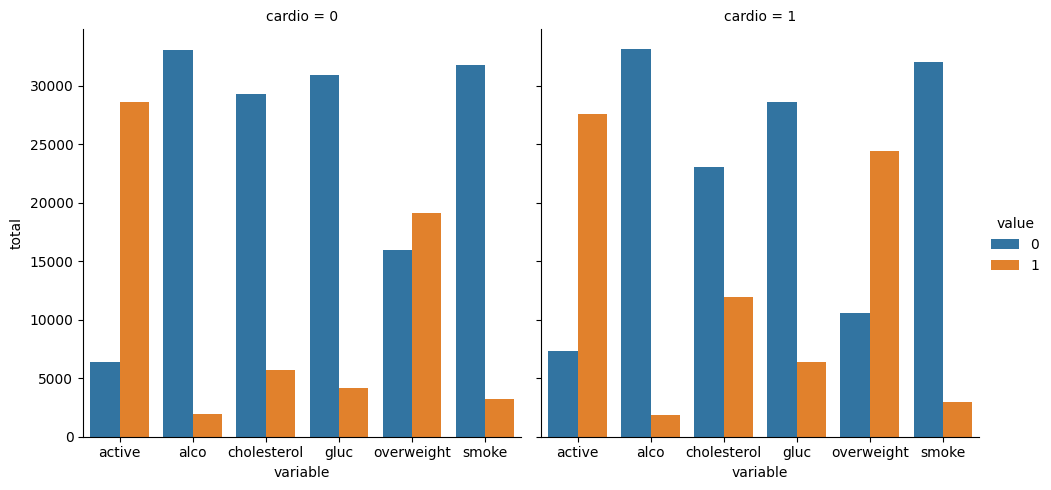

In [63]:
g = sns.catplot(x='variable', y='total', hue='value', col='cardio',
                    data=df_cat, kind='bar')
g.set_axis_labels("variable", "total")
fig = g.fig
fig.savefig('catplot.png')

In [73]:
# tạo fuction
def draw_cat_plot():
  df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
  df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

  g = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
  g.set_axis_labels("variable", "total")
  fig = g.fig
  fig.savefig('catplot.png')
  return fig

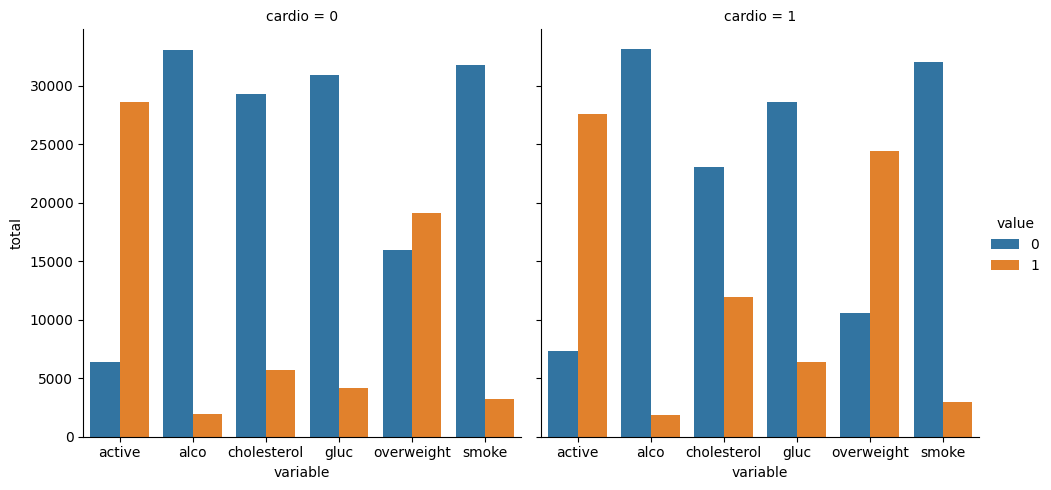

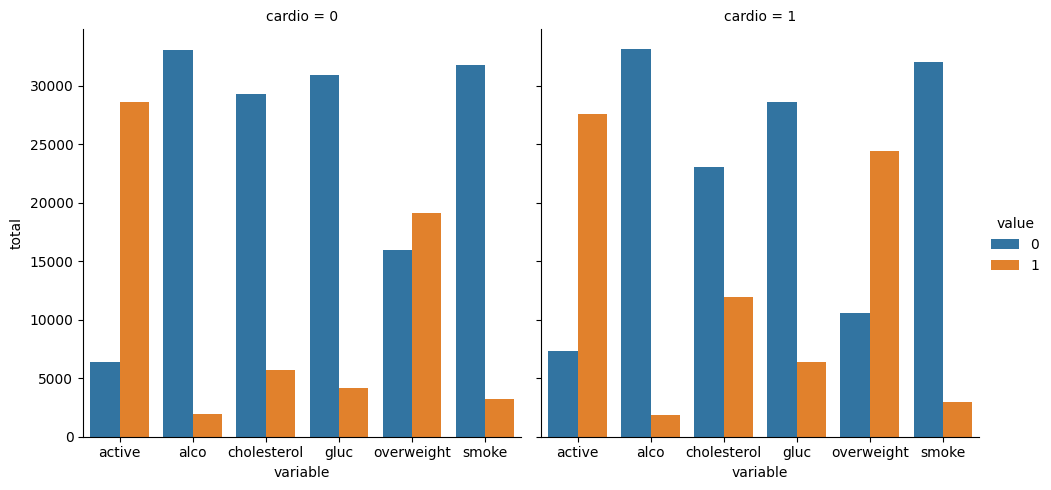

In [74]:
draw_cat_plot()

*   Vẽ Bản đồ nhiệt trong draw_heat_map function.
*   Làm sạch dữ liệu trong df_heat bằng cách lọc ra các phân đoạn bệnh nhân sau đây biểu thị dữ liệu không chính xác:
1.   diastolic pressure (huyết áp tâm trương) cao hơn systolic (huyết áp tâm thu) (Giữ dữ liệu chính xác với (df['ap_lo'] <= df['ap_hi']))
2.   height thấp hơn Quantile1 (Giữ nguyên dữ liệu chính xác với (df['height'] >= df['height'].quantile(0.025)))
3.   height lớn hơn Quantile3
4.   weight thấp hơn Quantile1
5.   weight lớn hơn Quantile3
*   Tính toán ma trận tương quan và lưu trữ nó trong corr.
*   Tạo mask cho hình tam giác phía trên và lưu trữ nó trong mask.
*   Thiết lập matplotlib
*   Vẽ ma trận tương quan bằng phương pháp được cung cấp bởi seaborn import: sns.heatmap().








In [91]:
df_heat = df[(df['ap_lo']<=df['ap_hi']) & (df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975)) & (df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [92]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [93]:
# ma trận tương quan có 2 nửa giống nhau nên chỉ cần coi 1 nửa để tránh trùng lặp thông tin
mask = np.triu(np.ones_like(corr, dtype=bool))

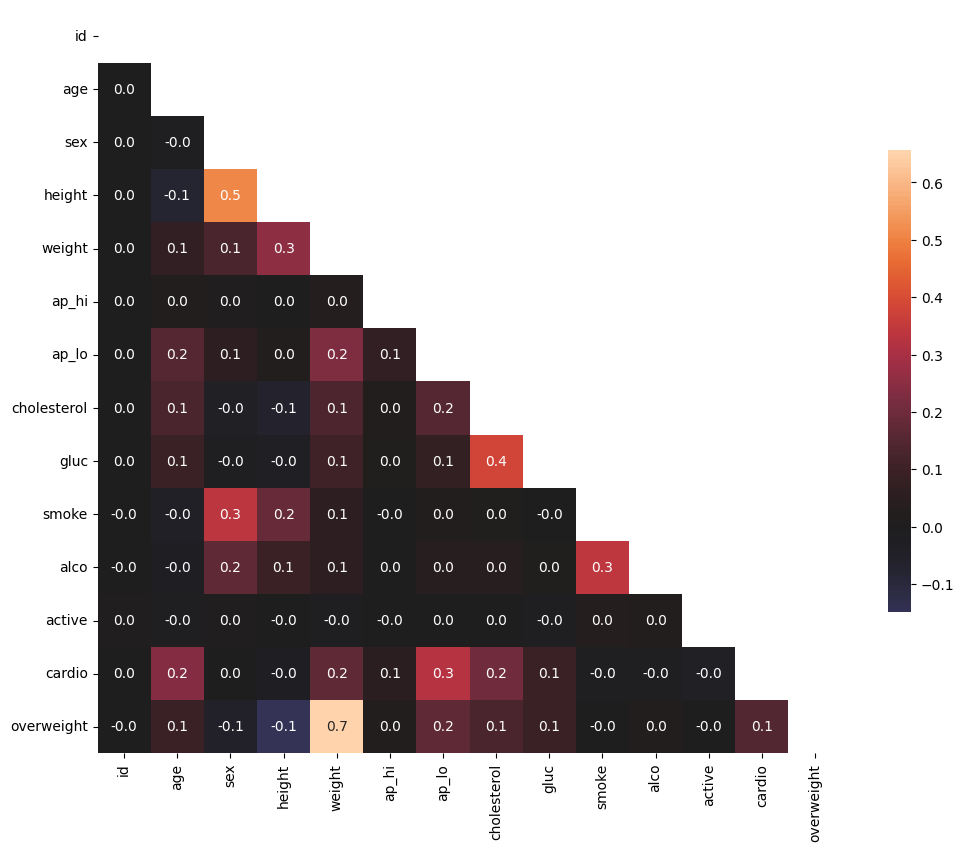

In [94]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0, square=True, cbar_kws={"shrink": 0.5})
fig.savefig('heatmap.png')


In [104]:
# def
def draw_heat_map():
  df_heat = df[(df['ap_lo']<=df['ap_hi'])
  & (df['height']<=df['height'].quantile(0.025))
  & (df['height']<=df['height'].quantile(0.975))
  & (df['weight']>=df['weight'].quantile(0.025))
  & (df['weight']<=df['weight'].quantile(0.975))]
  corr = df_heat.corr()

  mask = np.triu(np.ones_like(corr, dtype=bool))
  fig,ax = plt.subplots(figsize = (10,10))
  sns.heatmap(corr, mask=mask, annot = True, fmt= '.1f', center=0, square=True, cbar_kws={"shrink": 0.5})
  fig.savefig('heatmap.png')
  return fig

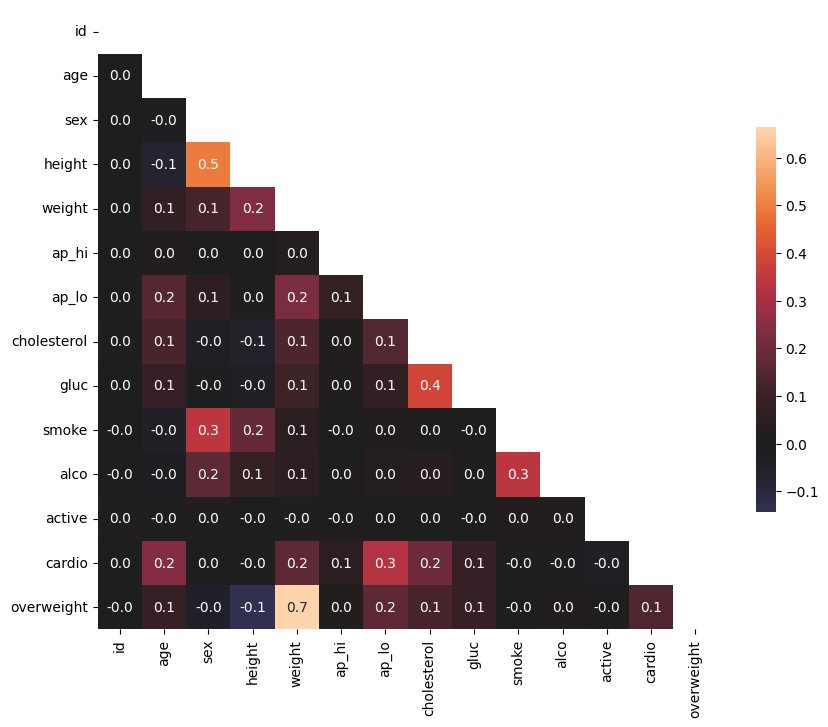

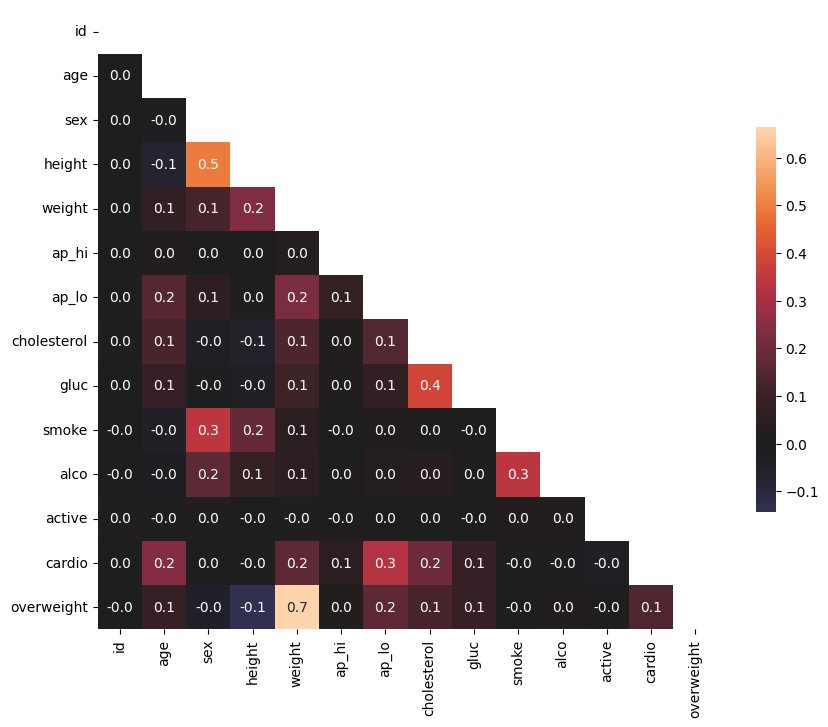

In [105]:
draw_heat_map()